<a href="https://colab.research.google.com/github/rramraj08/Entity_Resolution_Rogers/blob/master/Rogers_Ramraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entity Resolution

Entity Resolution is the task of disambiguating manifestations of real world entities in various records or mentions by linking and grouping. For example, there could be different ways of addressing the same person in text, different addresses for businesses, or photos of a particular object.

## Objective: 

We are given two datasets - Scholar and DBLP. The goal is to find out what records from one match with the other. 


## Our approach: 

We shall first start by taking a look at the data and doing some basic cleaning. Next, we shall be applying the following approaches: 

*   Dedupe *(dedupe.io - an open source library)*
    * Dedupe dataA 
    * Dedupe dataB 



### Setting up the environment. 

In [ ]:
! pip install pandas-dedupe
! pip install numpy --upgrade

     |████████████████████████████████| 90 kB 5.7 MB/s 
     |████████████████████████████████| 241 kB 17.6 MB/s 
     |████████████████████████████████| 155 kB 47.3 MB/s 
     |████████████████████████████████| 79 kB 9.3 MB/s 
     |████████████████████████████████| 71 kB 8.9 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 103 kB 60.4 MB/s 
     |████████████████████████████████| 3.6 MB 51.0 MB/s 
     |████████████████████████████████| 531 kB 71.4 MB/s 
     |████████████████████████████████| 253 kB 55.3 MB/s 
     |████████████████████████████████| 251 kB 68.3 MB/s 
     |████████████████████████████████| 787 kB 47.1 MB/s 
     |████████████████████████████████| 203 kB 61.3 MB/s 
     |████████████████████████████████| 15.7 MB 170 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not cur

In [ ]:
import pandas as pd 
import numpy as np 
import pandas_dedupe

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DBLP.csv to DBLP.csv
Saving Scholar.csv to Scholar.csv
User uploaded file "DBLP.csv" with length 351681 bytes
User uploaded file "Scholar.csv" with length 9007451 bytes


#### Loading the data: 

The data contained some special characters and hence a different encoding (latin) was required to required to read it. 

In [ ]:
dfa = pd.read_csv('Scholar.csv' , encoding= 'unicode_escape')
dfb = pd.read_csv('DBLP.csv' , encoding='latin-1' )

Taking a look at the data:

In [ ]:
dfa.head(2)

,idScholar,title,authors,venue,year,row_id
0,aKcZKwvwbQwJ,11578 Sorrento Valley Road,QD Inc,"San Diego,",NaN,1
1,ixKfiTHoaDoJ,Initiation of crazes in polystyrene,"AS Argon, JG Hannoosh","Phil. Mag,",NaN,2


In [ ]:
dfb.head(2)

,idDBLP,title,authors,venue,year,row_id
0,conf/vldb/RusinkiewiczKTWM95,Towards a Cooperative Transaction Model - The ...,"M Rusinkiewicz, W Klas, T Tesch, J W_sch, P Muth",VLDB,1995,1
1,journals/sigmod/EisenbergM02,SQL/XML is Making Good Progress,"A Eisenberg, J Melton",SIGMOD Record,2002,2


The two datasets above show similar fields. The majority of the data is in text format. 

Data cleaning approach:

*   To convert the text into lowercase,remove punctuation, apply stemming / lemmetization




## Exploratory Data Analysis: 



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

Plot top 10 venues

In [ ]:

dfa_plot = dfa.groupby('venue').agg('count')[['idScholar']].sort_values('idScholar' , ascending= False)[:10].reset_index()
dfa_plot

,venue,idScholar
0,"LECTURE NOTES IN COMPUTER SCIENCE,",964
1,"Cochrane Database Syst Rev,",910
2,"New Directions for Higher Education,",894
3,"Phil. Mag,",832
4,"Computer Networks,",796
5,"BT Technology Journal,",751
6,"VLDB,",741
7,"SIGMOD Record,",738
8,"Information and Software Technology,",689
9,"ACM Transactions on Database Systems,",685


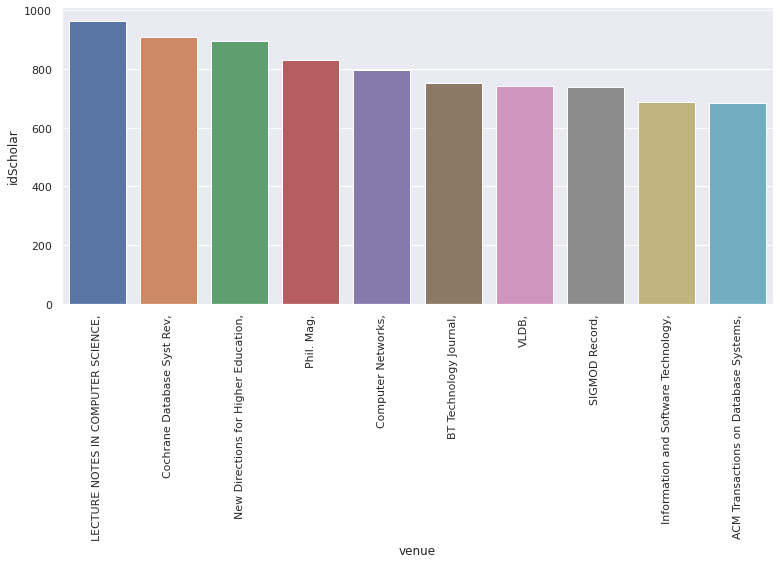

In [ ]:

dfa_plot = dfa.groupby('venue').agg('count')[['idScholar']].sort_values('idScholar' , ascending= False)[:10].reset_index()
sns.set(rc={'figure.figsize':(11 , 8)})

sns.barplot(  x = 'venue' , y='idScholar' , data = dfa_plot)

plt.xticks(rotation=90)
plt.tight_layout()

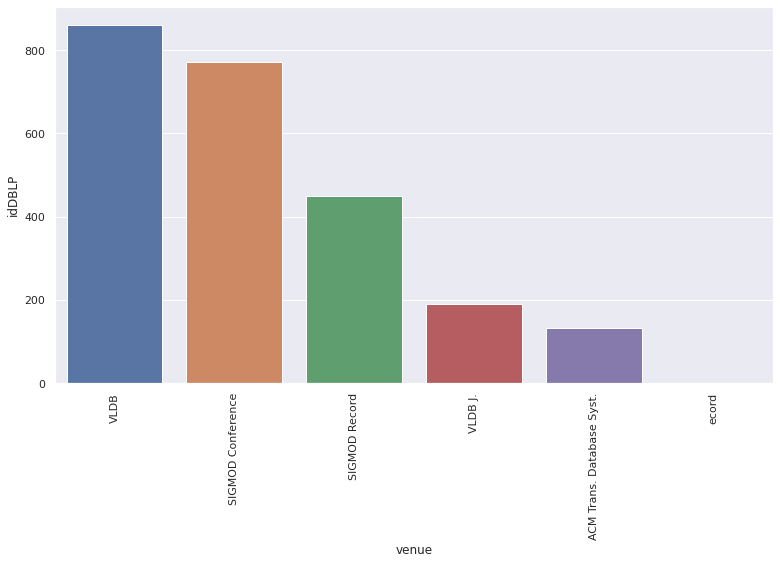

In [ ]:

dfb_plot = dfb.groupby('venue').agg('count')[['idDBLP']].sort_values('idDBLP' , ascending= False)[:10].reset_index()
sns.set(rc={'figure.figsize':(11 , 8)})

sns.barplot(  x = 'venue' , y='idDBLP' , data = dfb_plot)

plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
# dfa['year'].unique()
dfa.groupby('year').agg('count')[['idScholar']].sort_values('idScholar' , ascending= False).reset_index()[:10]

,year,idScholar
0,2000.0,2110
1,2001.0,1944
2,1999.0,1832
3,1998.0,1684
4,2002.0,1589
5,1997.0,1567
6,1996.0,1519
7,2003.0,1512
8,2004.0,1447
9,1995.0,1313


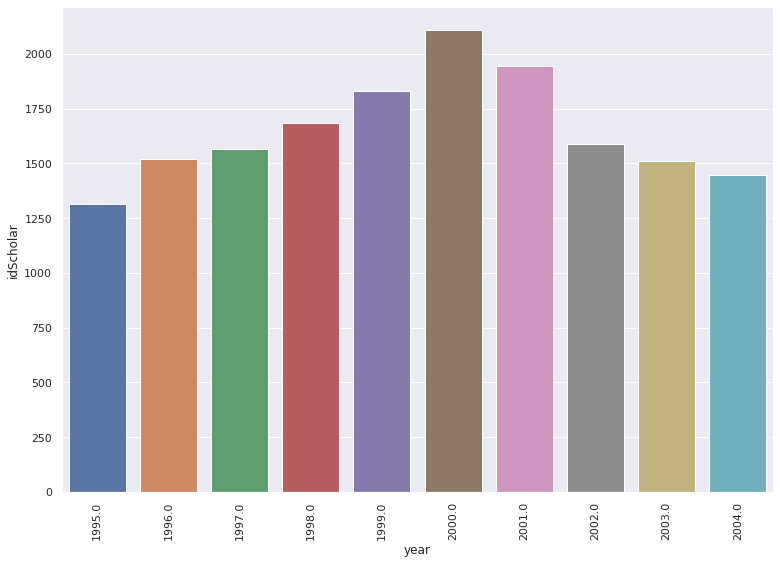

In [ ]:
dfa_plot = dfa.groupby('year').agg('count')[['idScholar']].sort_values('idScholar' , ascending= False).reset_index()[:10]
sns.set(rc={'figure.figsize':(11 , 8)})

sns.barplot(  x = 'year' , y='idScholar' , data = dfa_plot)

plt.xticks(rotation=90)
plt.tight_layout()

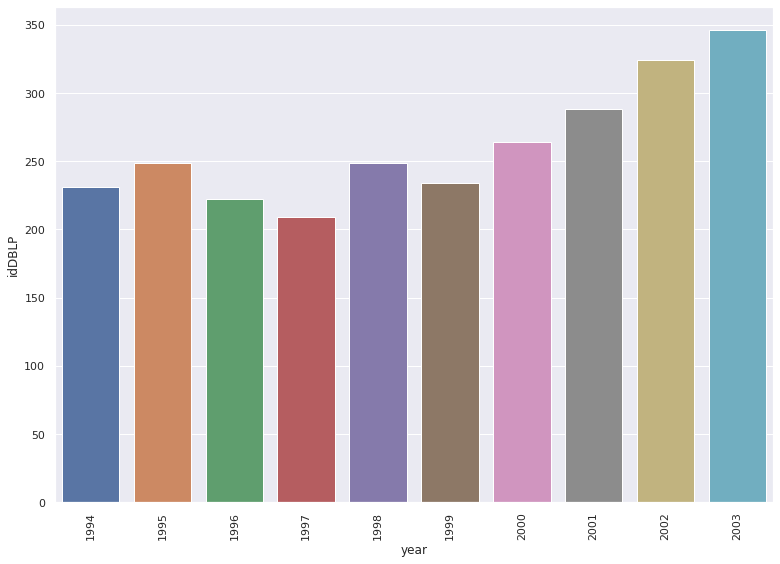

In [ ]:
dfb_plot = dfb.groupby('year').agg('count')[['idDBLP']].sort_values('idDBLP' , ascending= False)[:10].reset_index()
sns.set(rc={'figure.figsize':(11 , 8)})

sns.barplot(  x = 'year' , y='idDBLP' , data = dfb_plot)

plt.xticks(rotation=90)
plt.tight_layout()

### Data Cleaning 

* Punctuation removal    
* Stemming / Stopward removal 
* Lemmetization 



In [ ]:
! pip install nltk

In [ ]:
import nltk

from nltk.corpus import stopwords
def performStemAndLemma(textcontent):
    # Write your code here
    #Step 1
    tokenizedword = nltk.regexp_tokenize(textcontent, pattern = r'\w*', gaps = False)
    #Step 2
    tokenizedwords = [y for y in tokenizedword if y != '']
    unique_tokenizedwords = set(tokenizedwords)
    tokenizedwords = [x.lower() for x in unique_tokenizedwords if x != '']
    #Step 3
    #unique_tokenizedwords = set(tokenizedwords)
    stop_words = set(stopwords.words('english')) 
    filteredwords = []
    for x in tokenizedwords:
        if x not in stop_words:
            filteredwords.append(x)
    #Steps 4, 5 , 6
    ps = nltk.stem.PorterStemmer()
    ls = nltk.stem.LancasterStemmer()
    wnl = nltk.stem.WordNetLemmatizer()
    porterstemmedwords =[]
    lancasterstemmedwords = []
    lemmatizedwords = []
    for x in filteredwords:
        porterstemmedwords.append(ps.stem(x))
        lancasterstemmedwords.append(ls.stem(x))
        lemmatizedwords.append(wnl.lemmatize(x))
    return ' '.join(porterstemmedwords)

In [ ]:
# nltk.download('wordnet')
# nltk.download('stopwords')

dfa['title'] = dfa['title'].apply(lambda x :  performStemAndLemma(re.sub(r'[^\w\s]','' , x.lower())) )
dfb['title'] = dfb['title'].apply(lambda x :  performStemAndLemma(re.sub(r'[^\w\s]','' , x.lower())) )

# performStemAndLemma

It appears that that the venue's in both the dataset may not conform to same format. It would be difficult for any algo to match these on the basis of column venue. 

## Dudupe.io

Dedupe is an open source platform for deduping use cases. It fits well to our record linkage use case as well. 

### How it works? 

Dedupe will help us remove duplicate entries from our people dataset of name entities, whilst taking into account the paragraph information which provides context to the named entities. After this dedupe will help us to link the records in both the datasets. 

Dedupe takes in human training data and comes up with the best rules for your dataset to quickly and automatically find similar records, even with very large databases.


### How we shall apply it? 

*   Dedupe both the datasets to make sure that there are no duplicates in either. 
*   Apply the record linking method. 

## What columns we shall use? 

We will start by just using title and authors columns as the other columns are not quite relevant. 




In [ ]:
import pandas as pd
import pandas_dedupe


dfa =  pandas_dedupe.dedupe_dataframe(dfa,  ['title', 'authors'])

dfb =  pandas_dedupe.dedupe_dataframe(dfb,  ['title', 'authors'])

#initiate matching
df_final = pandas_dedupe.link_dataframes(dfa, dfb, ['title', 'authors'])

#send output to csv
df_final.to_csv('linkage_output.csv')

Importing data ...
Starting active labeling...


title : nsf industrialacadem workshop system databas cooper
authors : m carey, l seligman

title : nsf industrialacadem workshop system databas cooper
authors : None

0/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished


y


title : servic softwar asp aggreg
authors : c bussler

title : servic softwar asp aggreg
authors : None

1/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


title : editori
authors : d ralph, s searby

title : editori
authors : None

2/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


title : editori
authors : s wright, a steventon

title : editori
authors : None

3/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


title : challeng data larg biodivers informat develop complex rapid databas
authors : ma lane, jl edwards, e nielsen

title : challeng data larg biodivers informat develop complex rapid databas keynot
authors : None

4/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


title : editor guest introduct imag databas
authors : ss iyengar, rl kashyap

title : editor guest introduct
authors : None

4/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


title : influenti paper
authors : k ross

title : influenti paper reminisc
authors : None

4/10 positive, 2/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


title : process commit revisit distribut databas system perform
authors : r gupta, j haritsa, k ramamritham

title : process commit revisit distribut databas system
authors : r gupta, j haritsa, k ramamritham

4/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


title : authent electron preserv longterm record framework model
authors : we underwood

title : authent electron preserv longterm record
authors : l duranti

5/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


title : electron commerc
authors : g doukidis, m themistocleous, w drakos, a

title : electron commerc view activ
authors : s abiteboul, b amann, s cluet, a eyal, l mignet, t milo

5/10 positive, 4/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


title : editor guest introduct assur assur qualiti softwar
authors : jm voas

title : editor guest introduct
authors : None

5/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


title : editor guest introduct assur assur qualiti softwar
authors : jm voas

title : editor guest introduct
authors : None

5/10 positive, 6/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


title : editor guest introduct web special section search mine
authors : b liu, s chakrabarti

title : editor guest introduct
authors : None

5/10 positive, 7/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


title : editori guest
authors : m jarke

title : editori
authors : None

5/10 positive, 8/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


f


Finished labeling
/usr/local/lib/python3.7/dist-packages/rlr/crossvalidation.py:122: RuntimeWarning: invalid value encountered in double_scalars
  * (true_distinct + false_distinct)))


Clustering...
# duplicate sets 2216


In [ ]:
linked_output = pd.read_csv('linkage_output.csv')

In [ ]:
linked_output.columns

Index(['Unnamed: 0', 'authors', 'cluster id', 'confidence', 'idDBLP',
       'idScholar', 'row_id', 'title', 'venue', 'year'],
      dtype='object')

DataFrame with linked records

In [ ]:
linked_output.head()

# It has both the ids idScholar and id DBLP

,Unnamed: 0,authors,cluster id,confidence,idDBLP,idScholar,row_id,title,venue,year
0,65893,NaN,0.0,0.928819,conf/sigmod/epstein95,NaN,1634,address keynot,NaN,1995.0
1,9556,m lehman,0.0,0.928819,NaN,bv48iknfbb8j,9557,address keynot,proceedings of the 4th international workshop ...,NaN
2,9464,q luo,1.0,0.928819,NaN,url:http://portal.acm.org/ft_gateway.cfm3fid3d...,9465,job interview tight market,"sigmod record,",2002.0
3,64306,NaN,1.0,0.928819,journals/sigmod/luoi02,NaN,47,job interview tight market,NaN,2002.0
4,8538,portal.acm.org,2.0,0.928819,NaN,dnm-avln230j,8539,editor guest introduct,NaN,NaN


Final Output: 


In [ ]:
linked_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66876 entries, 0 to 66875
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  66876 non-null  int64  
 1   authors     66657 non-null  object 
 2   cluster id  4432 non-null   float64
 3   confidence  4432 non-null   float64
 4   idDBLP      2616 non-null   object 
 5   idScholar   63497 non-null  object 
 6   row_id      66876 non-null  int64  
 7   title       66873 non-null  object 
 8   venue       51668 non-null  object 
 9   year        32087 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 5.1+ MB


In [ ]:
linked_output['idDBLP'][linked_output['idDBLP'].isna()] = ''
linked_output['idScholar'][linked_output['idScholar'].isna()] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
linked_output['MatchId'] = linked_output['idDBLP'] + linked_output['idScholar']

In [ ]:
linked_output

,Unnamed: 0,authors,cluster id,confidence,idDBLP,idScholar,row_id,title,venue,year,MatchId
0,65893,NaN,0.0,0.928819,conf/sigmod/epstein95,,1634,address keynot,NaN,1995.0,conf/sigmod/epstein95
1,9556,m lehman,0.0,0.928819,,bv48iknfbb8j,9557,address keynot,proceedings of the 4th international workshop ...,NaN,bv48iknfbb8j
2,9464,q luo,1.0,0.928819,,url:http://portal.acm.org/ft_gateway.cfm3fid3d...,9465,job interview tight market,"sigmod record,",2002.0,url:http://portal.acm.org/ft_gateway.cfm3fid3d...
3,64306,NaN,1.0,0.928819,journals/sigmod/luoi02,,47,job interview tight market,NaN,2002.0,journals/sigmod/luoi02
4,8538,portal.acm.org,2.0,0.928819,,dnm-avln230j,8539,editor guest introduct,NaN,NaN,dnm-avln230j
...,...,...,...,...,...,...,...,...,...,...,...
66871,66845,NaN,NaN,NaN,journals/sigmod/ozsu02b,,2586,messag chair,NaN,2002.0,journals/sigmod/ozsu02b
66872,66847,"r cochrane, h pirahesh, n mattos",NaN,NaN,conf/vldb/cochranepm96,,2588,sql declar databas trigger constraint integr s...,vldb,1996.0,conf/vldb/cochranepm96
66873,66859,t rengarajan,NaN,NaN,conf/vldb/rengarajan96,,2600,11 sql system fast becam server,vldb,1996.0,conf/vldb/rengarajan96
66874,66862,"m rys, m norrie, h schek",NaN,NaN,conf/vldb/rysns96,,2603,system object relat multiprocessor parallel in...,vldb,1996.0,conf/vldb/rysns96


In [ ]:
# linked_output = 
linked_output['Scholar_Match'] = linked_output['Unnamed: 0']
linked_output['DBLP_Match'] = linked_output['row_id']

linked_output[['idDBLP' , 'idScholar' ,'Scholar_Match'  , 'DBLP_Match']]


linked_output['MatchId'] = linked_output['Scholar_Match'] + linked_output['DBLP_Match']
DBLP_Scholar_perfectMapping_Ramraj_Rajakumar = linked_output[['idDBLP' , 'idScholar' ,'Scholar_Match'  , 'DBLP_Match' , 'MatchId']]
DBLP_Scholar_perfectMapping_Ramraj_Rajakumar

,idDBLP,idScholar,Scholar_Match,DBLP_Match,MatchId
0,conf/sigmod/epstein95,NaN,65893,1634,67527
1,NaN,bv48iknfbb8j,9556,9557,19113
2,NaN,url:http://portal.acm.org/ft_gateway.cfm3fid3d...,9464,9465,18929
3,journals/sigmod/luoi02,NaN,64306,47,64353
4,NaN,dnm-avln230j,8538,8539,17077
...,...,...,...,...,...
66871,journals/sigmod/ozsu02b,NaN,66845,2586,69431
66872,conf/vldb/cochranepm96,NaN,66847,2588,69435
66873,conf/vldb/rengarajan96,NaN,66859,2600,69459
66874,conf/vldb/rysns96,NaN,66862,2603,69465


In [ ]:
DBLP_Scholar_perfectMapping_Ramraj_Rajakumar.to_csv("DBLP_Scholar_perfectMapping_Ramraj_Rajakumar.csv")

The end. 